In [2]:
!pip install rdkit
!pip install pandas
!pip install seaborn
!pip install keras
!pip install scikit-learn


In [3]:
from rdkit.Chem import AllChem
import pandas as pd
import os
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import PandasTools

In [4]:
dataset_file_path = "C:\\Users\\20212287\\OneDrive - TU Eindhoven\\Documents\\COURSES\\ADVANCED PROGRAMMING\\group_assignment\\tested_molecules.csv"
dataset_df = pd.read_csv(dataset_file_path)
dataset_df

,SMILES,PKM2_inhibition,ERK2_inhibition
0,C=C(C)c1nc(N)nc(N)n1,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0
...,...,...,...
1111,O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1,0,1
1112,O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1,0,1
1113,Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12,0,1
1114,c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1,0,1


In [5]:
def get_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol

dataset_df['mol_object'] = dataset_df['SMILES'].apply(get_molecule)


In [6]:
dataset_df
%store dataset_df

Stored 'dataset_df' (DataFrame)


In [7]:
exp_mean_basic_stats_PKM2 = dataset_df['PKM2_inhibition'].describe()
exp_mean_basic_stats_ERK2 = dataset_df['ERK2_inhibition'].describe()


In [8]:
exp_mean_basic_stats_PKM2, exp_mean_basic_stats_ERK2

(count    1116.000000
 mean        0.025090
 std         0.156467
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max         1.000000
 Name: PKM2_inhibition, dtype: float64,
 count    1116.000000
 mean        0.045699
 std         0.208925
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max         1.000000
 Name: ERK2_inhibition, dtype: float64)

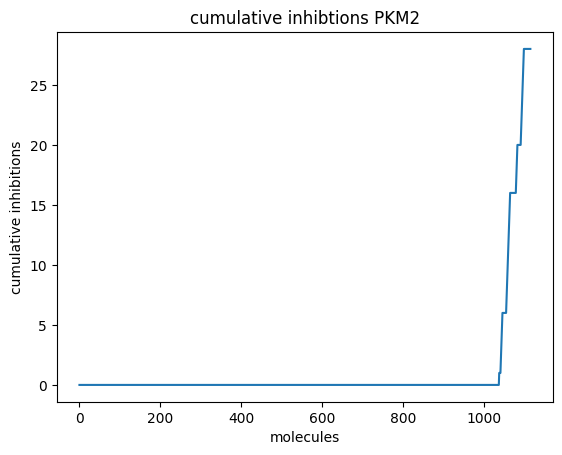

In [9]:
plt.figure()
plt.plot(dataset_df['PKM2_inhibition'].cumsum())
plt.xlabel('molecules')
plt.ylabel('cumulative inhibitions')
plt.title('cumulative inhibtions PKM2')
plt.show()

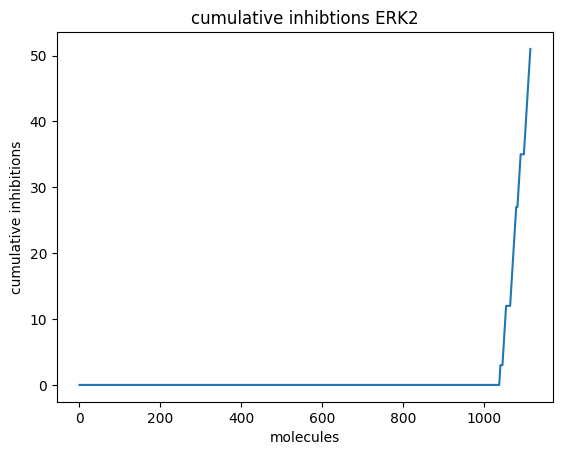

In [10]:
plt.figure()
plt.plot(dataset_df['ERK2_inhibition'].cumsum())
plt.xlabel('molecules')
plt.ylabel('cumulative inhibitions')
plt.title('cumulative inhibtions ERK2')
plt.show()

In [11]:
fpgen_AP = AllChem.GetAtomPairGenerator()
def get_morgan_fp(mol):
    morgan_fp = Chem.AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    return morgan_fp

def get_AP_FP(mol):
    AP_FPS = fpgen_AP.GetFingerprint(mol)
    return AP_FPS

dataset_df['morgan_fingerprint'] = dataset_df['mol_object'].apply(get_morgan_fp)
dataset_df['AtomPairs_fingerprint'] = dataset_df['mol_object'].apply(get_AP_FP)
dataset_df['AtomPairs_fingerprint']


0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...
3       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...
                              ...                        
1111    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1112    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1113    [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
1114    [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1115    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: AtomPairs_fingerprint, Length: 1116, dtype: object

In [12]:
len(dataset_df['morgan_fingerprint'][1])

2048

In [13]:
dataset_df

,SMILES,PKM2_inhibition,ERK2_inhibition,mol_object,morgan_fingerprint,AtomPairs_fingerprint
0,C=C(C)c1nc(N)nc(N)n1,0,0,<rdkit.Chem.rdchem.Mol object at 0x000001842BF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,<rdkit.Chem.rdchem.Mol object at 0x000001842BF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,<rdkit.Chem.rdchem.Mol object at 0x000001842BF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,<rdkit.Chem.rdchem.Mol object at 0x000001842BF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,<rdkit.Chem.rdchem.Mol object at 0x000001842BF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
...,...,...,...,...,...,...
1111,O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1,0,1,<rdkit.Chem.rdchem.Mol object at 0x000001842BF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1112,O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1,0,1,<rdkit.Chem.rdchem.Mol object at 0x000001842BF...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1113,Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12,0,1,<rdkit.Chem.rdchem.Mol object at 0x000001842BF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1114,c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1,0,1,<rdkit.Chem.rdchem.Mol object at 0x000001842BF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [14]:
!pip install --upgrade tensorflow protobuf


  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Using cached protobuf-5.27.1-cp38-cp38-win_amd64.whl.metadata (592 bytes)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached protobuf-4.25.3-cp38-cp38-win_amd64.whl.metadata (541 bytes)
Using cached protobuf-4.25.3-cp38-cp38-win_amd64.whl (413 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0


In [15]:
!pip install protobuf==3.20.0



  Using cached protobuf-3.20.0-cp38-cp38-win_amd64.whl.metadata (699 bytes)
Using cached protobuf-3.20.0-cp38-cp38-win_amd64.whl (904 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.0 which is incompatible.


In [16]:
!set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python



In [17]:
pip install --upgrade scipy


Note: you may need to restart the kernel to use updated packages.


Epoch 1/50
28/28 [==============================] - 2s 28ms/step - loss: 0.2171 - accuracy: 0.9720 - val_loss: 0.1413 - val_accuracy: 0.9732
Epoch 2/50
28/28 [==============================] - 1s 21ms/step - loss: 0.1751 - accuracy: 0.9753 - val_loss: 0.1211 - val_accuracy: 0.9732
Epoch 3/50
28/28 [==============================] - 1s 20ms/step - loss: 0.1253 - accuracy: 0.9765 - val_loss: 0.1160 - val_accuracy: 0.9732
Epoch 4/50
28/28 [==============================] - 1s 21ms/step - loss: 0.1184 - accuracy: 0.9742 - val_loss: 0.1364 - val_accuracy: 0.9732
Epoch 5/50
28/28 [==============================] - 1s 21ms/step - loss: 0.0799 - accuracy: 0.9776 - val_loss: 0.1212 - val_accuracy: 0.9732
Epoch 6/50
28/28 [==============================] - 1s 21ms/step - loss: 0.0588 - accuracy: 0.9753 - val_loss: 0.1320 - val_accuracy: 0.9688
Epoch 7/50
28/28 [==============================] - 1s 21ms/step - loss: 0.0418 - accuracy: 0.9821 - val_loss: 0.2583 - val_accuracy: 0.9732
Epoch 8/50
28

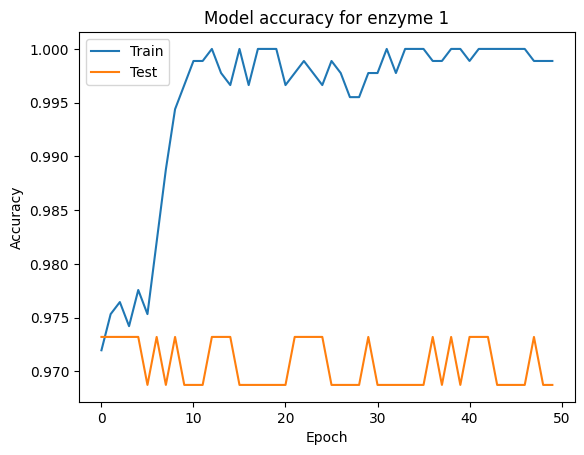

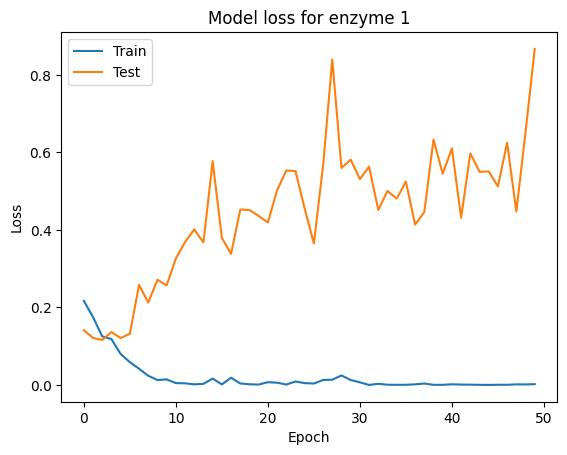

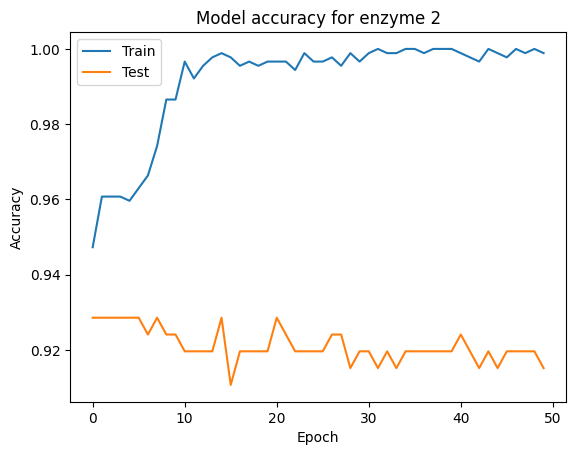

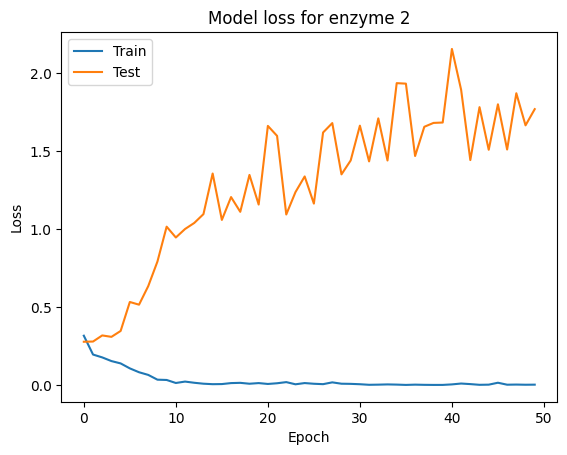

7/7 [==============================] - 0s 4ms/step - loss: 0.8670 - accuracy: 0.9688
Test Accuracy for enzyme 1: 96.88%
7/7 [==============================] - 0s 3ms/step - loss: 1.7676 - accuracy: 0.9152
Test Accuracy for enzyme 2: 91.52%


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Example data loading (replace with actual data loading)
# Assuming you have a DataFrame with the mentioned columns
# Replace with your actual data
data = pd.DataFrame({
    'Molecule': dataset_df['mol_object'],  # RDKit molecule objects
    'Morgan_Fingerprint': dataset_df['morgan_fingerprint'],  # Morgan fingerprints
    'Atom_Pairs_Fingerprint': dataset_df['AtomPairs_fingerprint'],  # Atom pairs fingerprints
    'Inhibition_Enzyme1': dataset_df['PKM2_inhibition'],  # Binary labels for enzyme 1 inhibition
    'Inhibition_Enzyme2': dataset_df['ERK2_inhibition']  # Binary labels for enzyme 2 inhibition
})

# Convert fingerprints to numpy arrays
X_morgan = np.array(data['Morgan_Fingerprint'].tolist())
X_atom_pairs = np.array(data['Atom_Pairs_Fingerprint'].tolist())

# Concatenate both types of fingerprints
X = np.concatenate((X_morgan, X_atom_pairs), axis=1)

# Labels for each enzyme
y_enzyme1 = np.array(data['Inhibition_Enzyme1'])
y_enzyme2 = np.array(data['Inhibition_Enzyme2'])

# Split data into training and testing sets for enzyme 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_enzyme1, test_size=0.2, random_state=42)

# Split data into training and testing sets for enzyme 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_enzyme2, test_size=0.2, random_state=42)

# Build the neural network model for enzyme 1
model1 = Sequential()
model1.add(Dense(512, input_dim=X_train1.shape[1], activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for enzyme 1
history1 = model1.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=50, batch_size=32)

# Build the neural network model for enzyme 2
model2 = Sequential()
model2.add(Dense(512, input_dim=X_train2.shape[1], activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for enzyme 2
history2 = model2.fit(X_train2, y_train2, validation_data=(X_test2, y_test2), epochs=50, batch_size=32)

# Plot training history for enzyme 1
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy for enzyme 1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss for enzyme 1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training history for enzyme 2
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy for enzyme 2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss for enzyme 2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the models
loss1, accuracy1 = model1.evaluate(X_test1, y_test1)
print(f"Test Accuracy for enzyme 1: {accuracy1*100:.2f}%")

loss2, accuracy2 = model2.evaluate(X_test2, y_test2)
print(f"Test Accuracy for enzyme 2: {accuracy2*100:.2f}%")


In [19]:
import pkg_resources 

import types 

 

def get_imports(): 

    for name, val in globals().items(): 

        if isinstance(val, types.ModuleType): 

            name = val.__name__.split(".")[0] 

        elif isinstance(val, type): 

            name = val.__module__.split(".")[0] 

 

        # Handle package name discrepancies (e.g., 'PIL' vs. 'Pillow') 

        poorly_named_packages = { 

            "PIL": "Pillow", 

            "sklearn": "scikit-learn" 

        } 

        if name in poorly_named_packages.keys(): 

            name = poorly_named_packages[name] 

 

        yield name 

 

imports = list(set(get_imports())) 

 

# Get the version of the root package from the installed packages 

requirements = [] 

for m in pkg_resources.working_set: 

    if m.project_name in imports and m.project_name != "pip": 

        requirements.append((m.project_name, m.version)) 

 

# Print the package names and their versions 

for r in requirements: 

    print(f"{r[0]}=={r[1]}") 

keras==2.13.1
matplotlib==3.7.5
numpy==1.24.3
pandas==2.0.3
rdkit==2023.9.6
seaborn==0.13.2
